In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df=pd.read_csv('/content/Cardiotocographic.csv')

In [126]:
df.head(10)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,73.0,0.5,43.0,2.4,64.000000,0.999926,2.000000
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.000000,17.0,2.1,0.0,10.4,130.000000,0.000000,1.000000
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.000000,16.0,2.1,0.0,13.4,130.000000,0.000000,1.000000
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.000000,16.0,2.4,0.0,23.0,117.000000,1.000000,1.000000
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.000000,16.0,2.4,0.0,19.9,117.000000,1.000000,1.000000
5,134.000000,0.001116,0.0,0.010493,0.009444,0.0,0.002099,26.0,5.9,0.0,0.0,150.000000,0.000000,3.000000
6,134.000000,0.001403,0.0,0.012623,0.008415,0.0,0.002805,29.0,6.3,0.0,0.0,150.000000,0.000000,-1.025988
7,122.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,83.0,0.5,6.0,15.6,69.920261,1.000000,3.000000
8,122.000000,0.038567,0.0,0.001517,0.000000,0.0,0.000000,84.0,0.5,5.0,13.6,68.000000,1.000000,3.000000
9,122.000000,0.000000,0.0,0.002967,0.000000,0.0,0.000000,86.0,0.3,6.0,10.6,68.000000,1.000000,3.000000


In [129]:
df.info() #displays information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


LB,AC,DS,DP,MLTV,Width,Tendency,NSP have null values.

In [130]:
df.isna().sum()   #displays the sum of null vales in dataframe

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [131]:
for i in df.isna().sum():   #will give how much percentage of null values are present in columns
  print((i/(len(df)))*100)

0.9877704609595485
0.940733772342427
0.0
0.0
0.0
0.9877704609595485
0.9877704609595485
0.0
0.0
0.0
0.9877704609595485
0.9877704609595485
0.9877704609595485
0.9877704609595485


Therefore, the null values are less than 5%. so, we only delete the rows containing null values

In [132]:
df.dropna(inplace=True,ignore_index=True) # drops the null values from dataframe for better analysis

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2105 non-null   float64
 2   FM        2105 non-null   float64
 3   UC        2105 non-null   float64
 4   DL        2105 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2105 non-null   float64
 8   MSTV      2105 non-null   float64
 9   ALTV      2105 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 230.4 KB


There is no inconsistencies in data types.

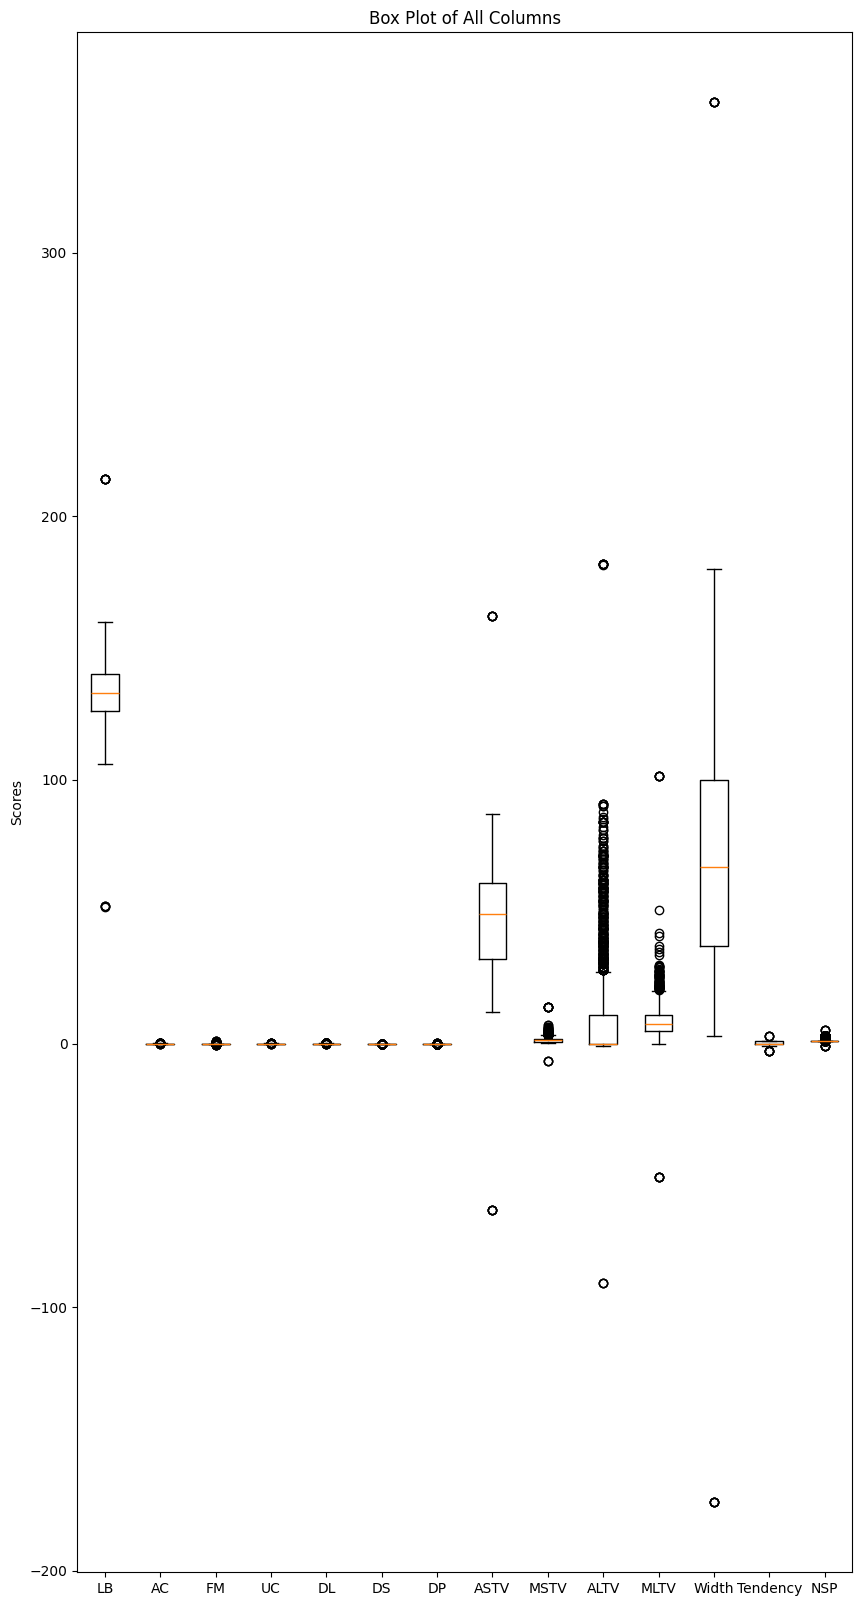

In [134]:
plt.figure(figsize=(10, 20))
plt.boxplot(df.values)
plt.xticks(range(1, len(df.columns)+1), df.columns)  # set column names as x-axis labels
plt.title('Box Plot of All Columns')
plt.ylabel('Scores')
plt.show()

every columns has outliers.so removing those outliers with upper or lower extreme based on the values

In [135]:
#Outlier_capping: User defined Function to calculate Upper Extreme and Lower Extreme value and only for capping
def outlier_capping(data,colname):
   q1=data[colname].quantile(0.25)
   q3=data[colname].quantile(0.75)
   iqr=q3-q1

   upper_extreme = q3 + (1.5 * iqr)
   lower_extreme = q1 - (1.5 * iqr)

   data.loc[data[colname]> upper_extreme,colname]=upper_extreme  # Now all the upper outlier values of columns will be replaced by upper extreme
   data.loc[data[colname]<lower_extreme,colname]=lower_extreme  # Now all the lower outlier values of columns will be replaced by lower extreme

   return lower_extreme, upper_extreme

In [136]:
outlier_capping(df,"LB")

(np.float64(105.0), np.float64(161.0))

In [137]:
df[df['LB']>161]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP


In [138]:
df[df['LB']<105]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP


In [139]:
outlier_capping(df,'AC')

(np.float64(-0.008474577), np.float64(0.014124295))

In [140]:
outlier_capping(df,'FM')

(np.float64(-0.003831417), np.float64(0.006385695))

In [141]:
outlier_capping(df,'UC')

(np.float64(-0.005208944500000001), np.float64(0.0135828835))

In [142]:
outlier_capping(df,'DS')

(np.float64(0.0), np.float64(0.0))

In [143]:
outlier_capping(df,'DP')

(np.float64(0.0), np.float64(0.0))

In [144]:
outlier_capping(df,'DL')

(np.float64(-0.004934211), np.float64(0.008223685))

In [145]:
outlier_capping(df,'ASTV')

(np.float64(-11.5), np.float64(104.5))

In [146]:
outlier_capping(df,'MSTV')

(np.float64(-0.8), np.float64(3.2))

In [147]:
outlier_capping(df,'ALTV')

(np.float64(-16.5), np.float64(27.5))

In [148]:
outlier_capping(df,'MLTV')

(np.float64(-4.850000000000001), np.float64(20.35))

In [149]:
outlier_capping(df,'Width')

(np.float64(-57.5), np.float64(194.5))

In [150]:
outlier_capping(df,'Tendency')

(np.float64(-1.5), np.float64(2.5))

In [151]:
outlier_capping(df,'NSP')

(np.float64(1.0), np.float64(1.0))

outliers are detected and treated with upper and lower extremes

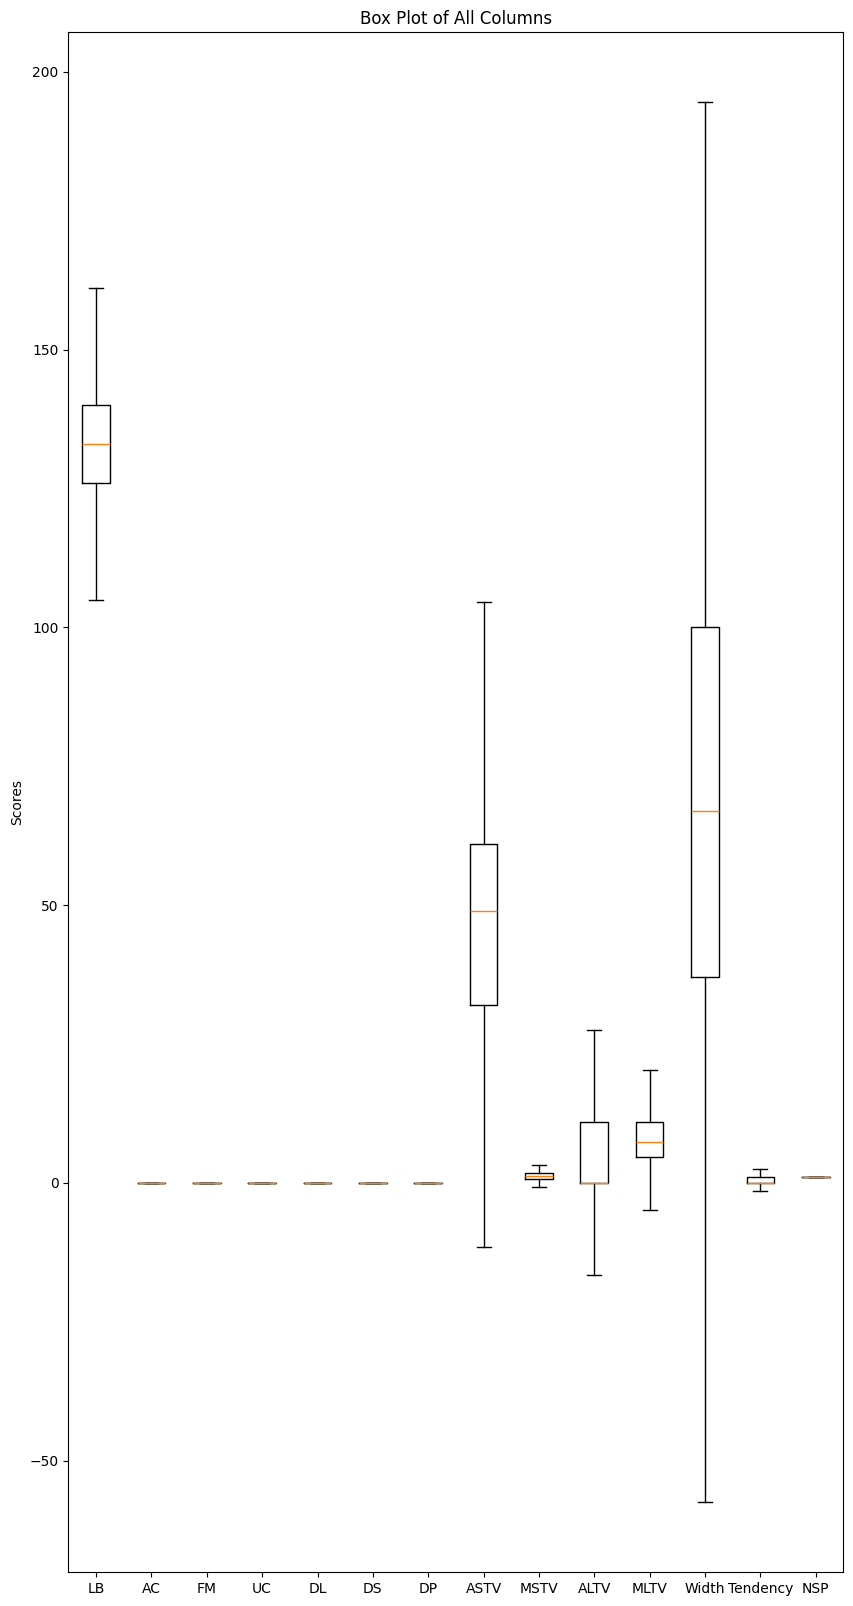

In [152]:
plt.figure(figsize=(10, 20))
plt.boxplot(df.values)
plt.xticks(range(1, len(df.columns)+1), df.columns)  # set column names as x-axis labels
plt.title('Box Plot of All Columns')
plt.ylabel('Scores')
plt.show()

#2.Q

In [153]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.0,2105.0,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.0
mean,133.293227,0.003143,0.001561,0.004358,0.001768,0.0,0.0,46.982677,1.302006,6.727067,8.022202,70.319997,0.319695,1.0
std,9.979659,0.003843,0.002473,0.003008,0.002672,0.0,0.0,17.636431,0.779684,10.397529,5.094420,39.767619,0.624697,0.0
min,105.000000,-0.008475,-0.003831,-0.005209,-0.004934,0.0,0.0,-11.500000,-0.800000,-16.500000,-4.850000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001631,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.0
75%,140.000000,0.005650,0.002554,0.006536,0.003289,0.0,0.0,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.0
max,161.000000,0.014124,0.006386,0.013583,0.008224,0.0,0.0,104.500000,3.200000,27.500000,20.350000,194.500000,2.500000,1.0


describes the statistical summary for each column in dataframe, including measures of central tendency (mean, median(50% in the table)) and dispersion (standard deviation(std in the table)).

In [154]:
def iqr(data):
  desc=data.describe()
  return desc.loc['75%'] - desc.loc['25%']
print(iqr(df))   #gives IQR values for every column

LB          14.000000
AC           0.005650
FM           0.002554
UC           0.004698
DL           0.003289
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.300000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64


# 3Q

<Axes: xlabel='AC', ylabel='Count'>

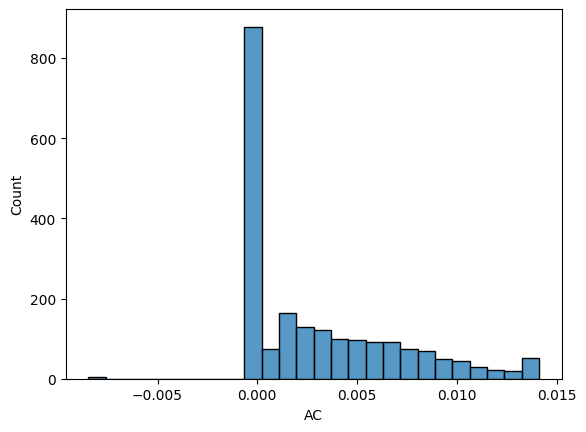

In [155]:
sns.histplot(df["AC"],edgecolor='black')


positively skewed and have more values near 0. most values are near to zero.

<Axes: xlabel='LB', ylabel='Count'>

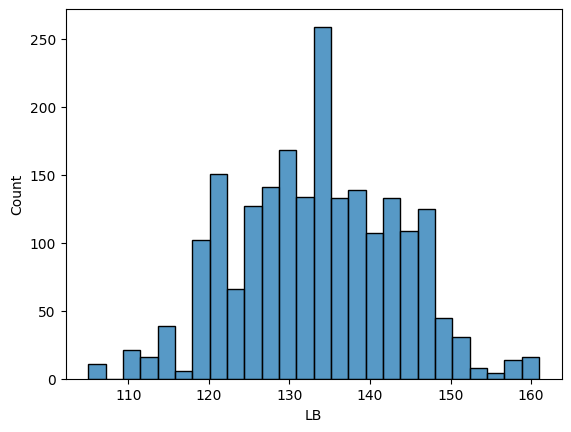

In [156]:
sns.histplot(df["LB"],edgecolor='black')

values are mostly between 119 to 150 and high at 134. the data is symmetrical with mean.

<Axes: xlabel='FM', ylabel='Count'>

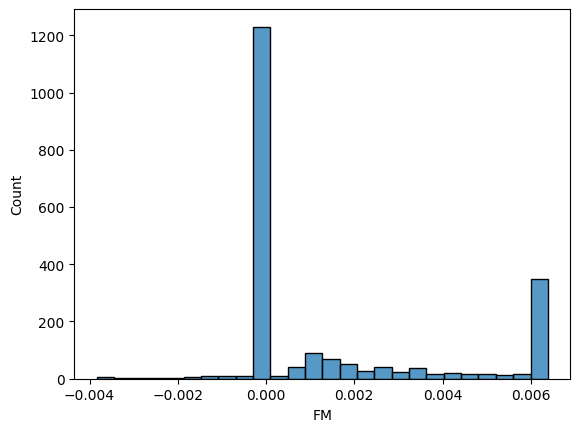

In [157]:
sns.histplot(df["FM"],edgecolor='black')

most values are nearly zero and positive. left side bars of 0  indicates few negative values

<Axes: xlabel='UC', ylabel='Count'>

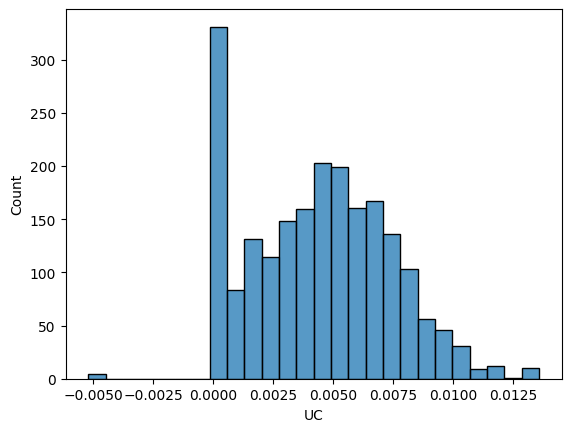

In [158]:
sns.histplot(df["UC"],edgecolor='black')

this histogram is positively skewed and most values are positive. many values are there at 0.  left side bars of 0 indicates few negative values

<Axes: xlabel='DS', ylabel='Count'>

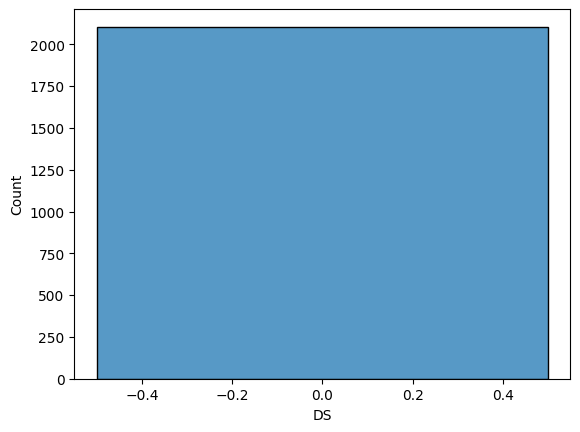

In [159]:
sns.histplot(df["DS"],edgecolor='black')

all values in -0.5 to 0.5 range are equally likely or occur with similar frequency.

<Axes: xlabel='DP', ylabel='Count'>

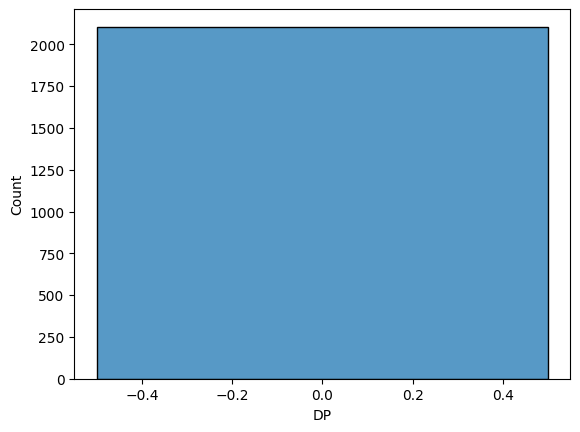

In [160]:
sns.histplot(df["DP"],edgecolor='black')

all values in -0.4 to 0.4 range are equally likely or occur in similar frequency.

<Axes: xlabel='DL', ylabel='Count'>

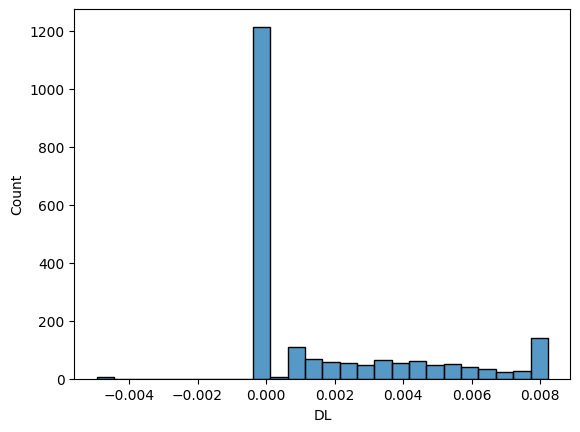

In [161]:
sns.histplot(df["DL"],edgecolor='black')

this histogram is positively skewed. many values are near to 0.  left side bars of 0 indicates few negative values.

<Axes: xlabel='ASTV', ylabel='Count'>

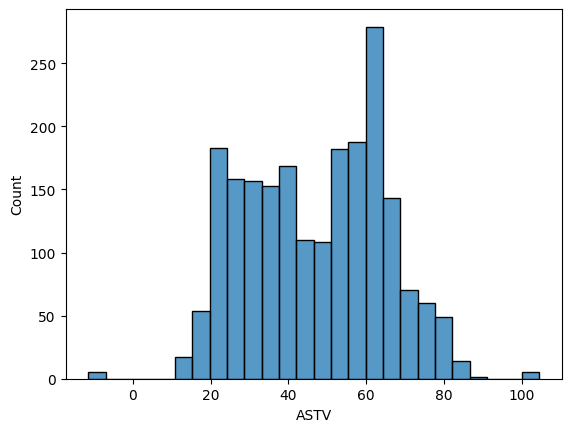

In [162]:
sns.histplot(df["ASTV"],edgecolor='black')

this histogram is neither positively nor negatively skewed.there are 2 peaks.one peak is around 20-25 and another at 60 to 65.

<Axes: xlabel='MSTV', ylabel='Count'>

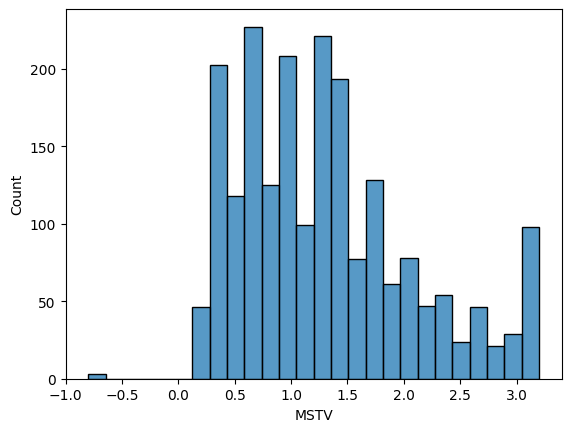

In [163]:
sns.histplot(df["MSTV"],edgecolor='black')

this histogram is positively skewed. left side bars of 0 indicates few negative values.but there multiple high peaks followed by small peaks.the concentration of values are there between 0.25 to 1.8.

<Axes: xlabel='ALTV', ylabel='Count'>

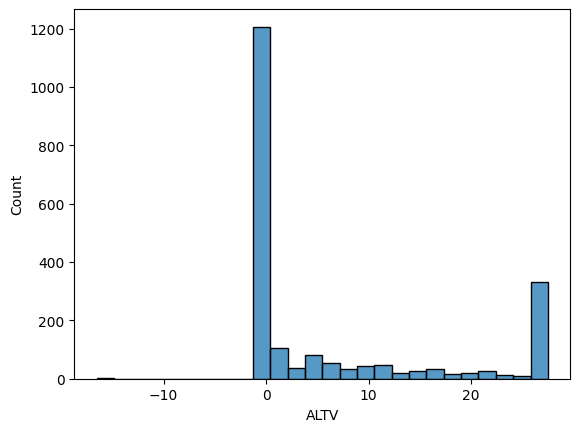

In [164]:
sns.histplot(df["ALTV"],edgecolor='black')

it is positively skewed if we consider the overall graph. the large bar indicating that the most of tha values are zero or near to zero ad other peak indicates nearly 250 values are greater than 27.

<Axes: xlabel='MLTV', ylabel='Count'>

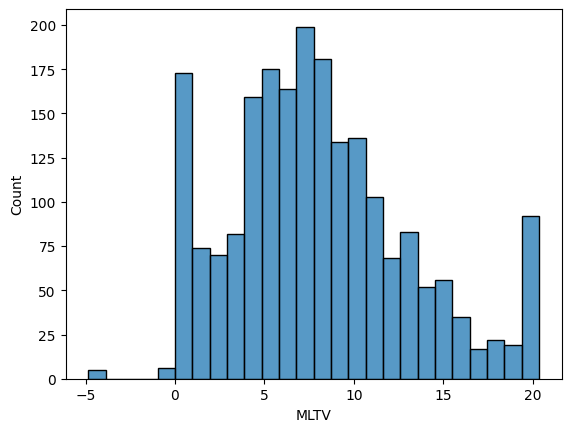

In [165]:
sns.histplot(df["MLTV"],edgecolor='black')

this histogram is neither positively nor negatively skewed because of the high peaks of bars. many values are near to zero and from 4 to 9. the left side bar of zero indicates some negative values.

<Axes: xlabel='Width', ylabel='Count'>

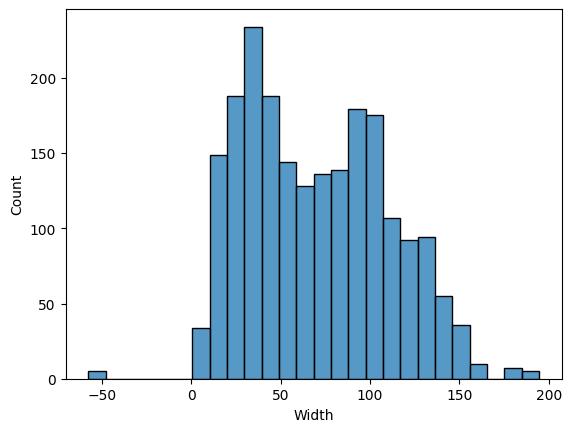

In [166]:
sns.histplot(df["Width"],edgecolor='black')

this histogram is positively skewed.many values lies between 20 to 50 and 90 to 110.the left side bar of zero indicates few negative values.

<Axes: xlabel='Tendency', ylabel='Count'>

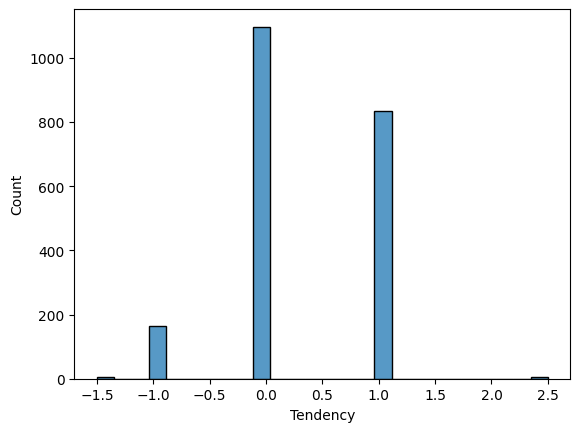

In [167]:
sns.histplot(df["Tendency"],edgecolor='black')

this histogram is positively skewed if we consider whole graph. many values are at 0 and near to zero.other peak shows the values are more at 1. left side bar of 0 indicates that there are some negative values.

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2105 non-null   float64
 2   FM        2105 non-null   float64
 3   UC        2105 non-null   float64
 4   DL        2105 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2105 non-null   float64
 8   MSTV      2105 non-null   float64
 9   ALTV      2105 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 230.4 KB


Not able to diplay bar charts or pie charts because there are no categorical columns in dataframe

<Axes: >

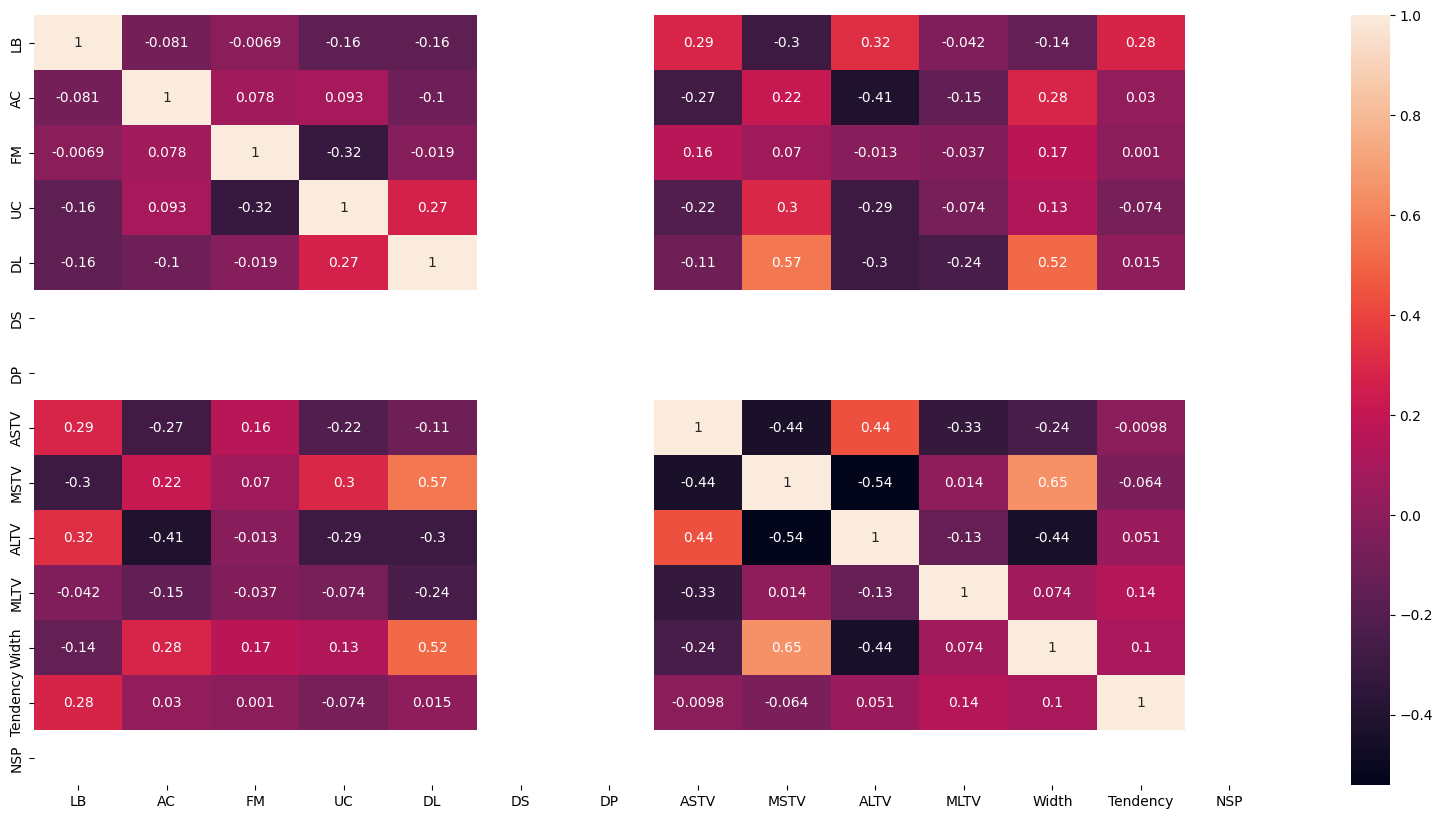

In [169]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)


the positive correlation between the columns are given below
* MSTV-DL with 0.57 value
* Width-DL with 0.52 value
* MSTV-Width with 0.65 value

there is also negative correlation between the columns.they are indicated with black cells

there is also no correlation between the tables with values near to zero and purple in color

In [172]:
df.drop(["DS","DP"],axis=1,inplace=True)

Because those 2 columns are not correlated with any column

<Figure size 2000x2000 with 0 Axes>

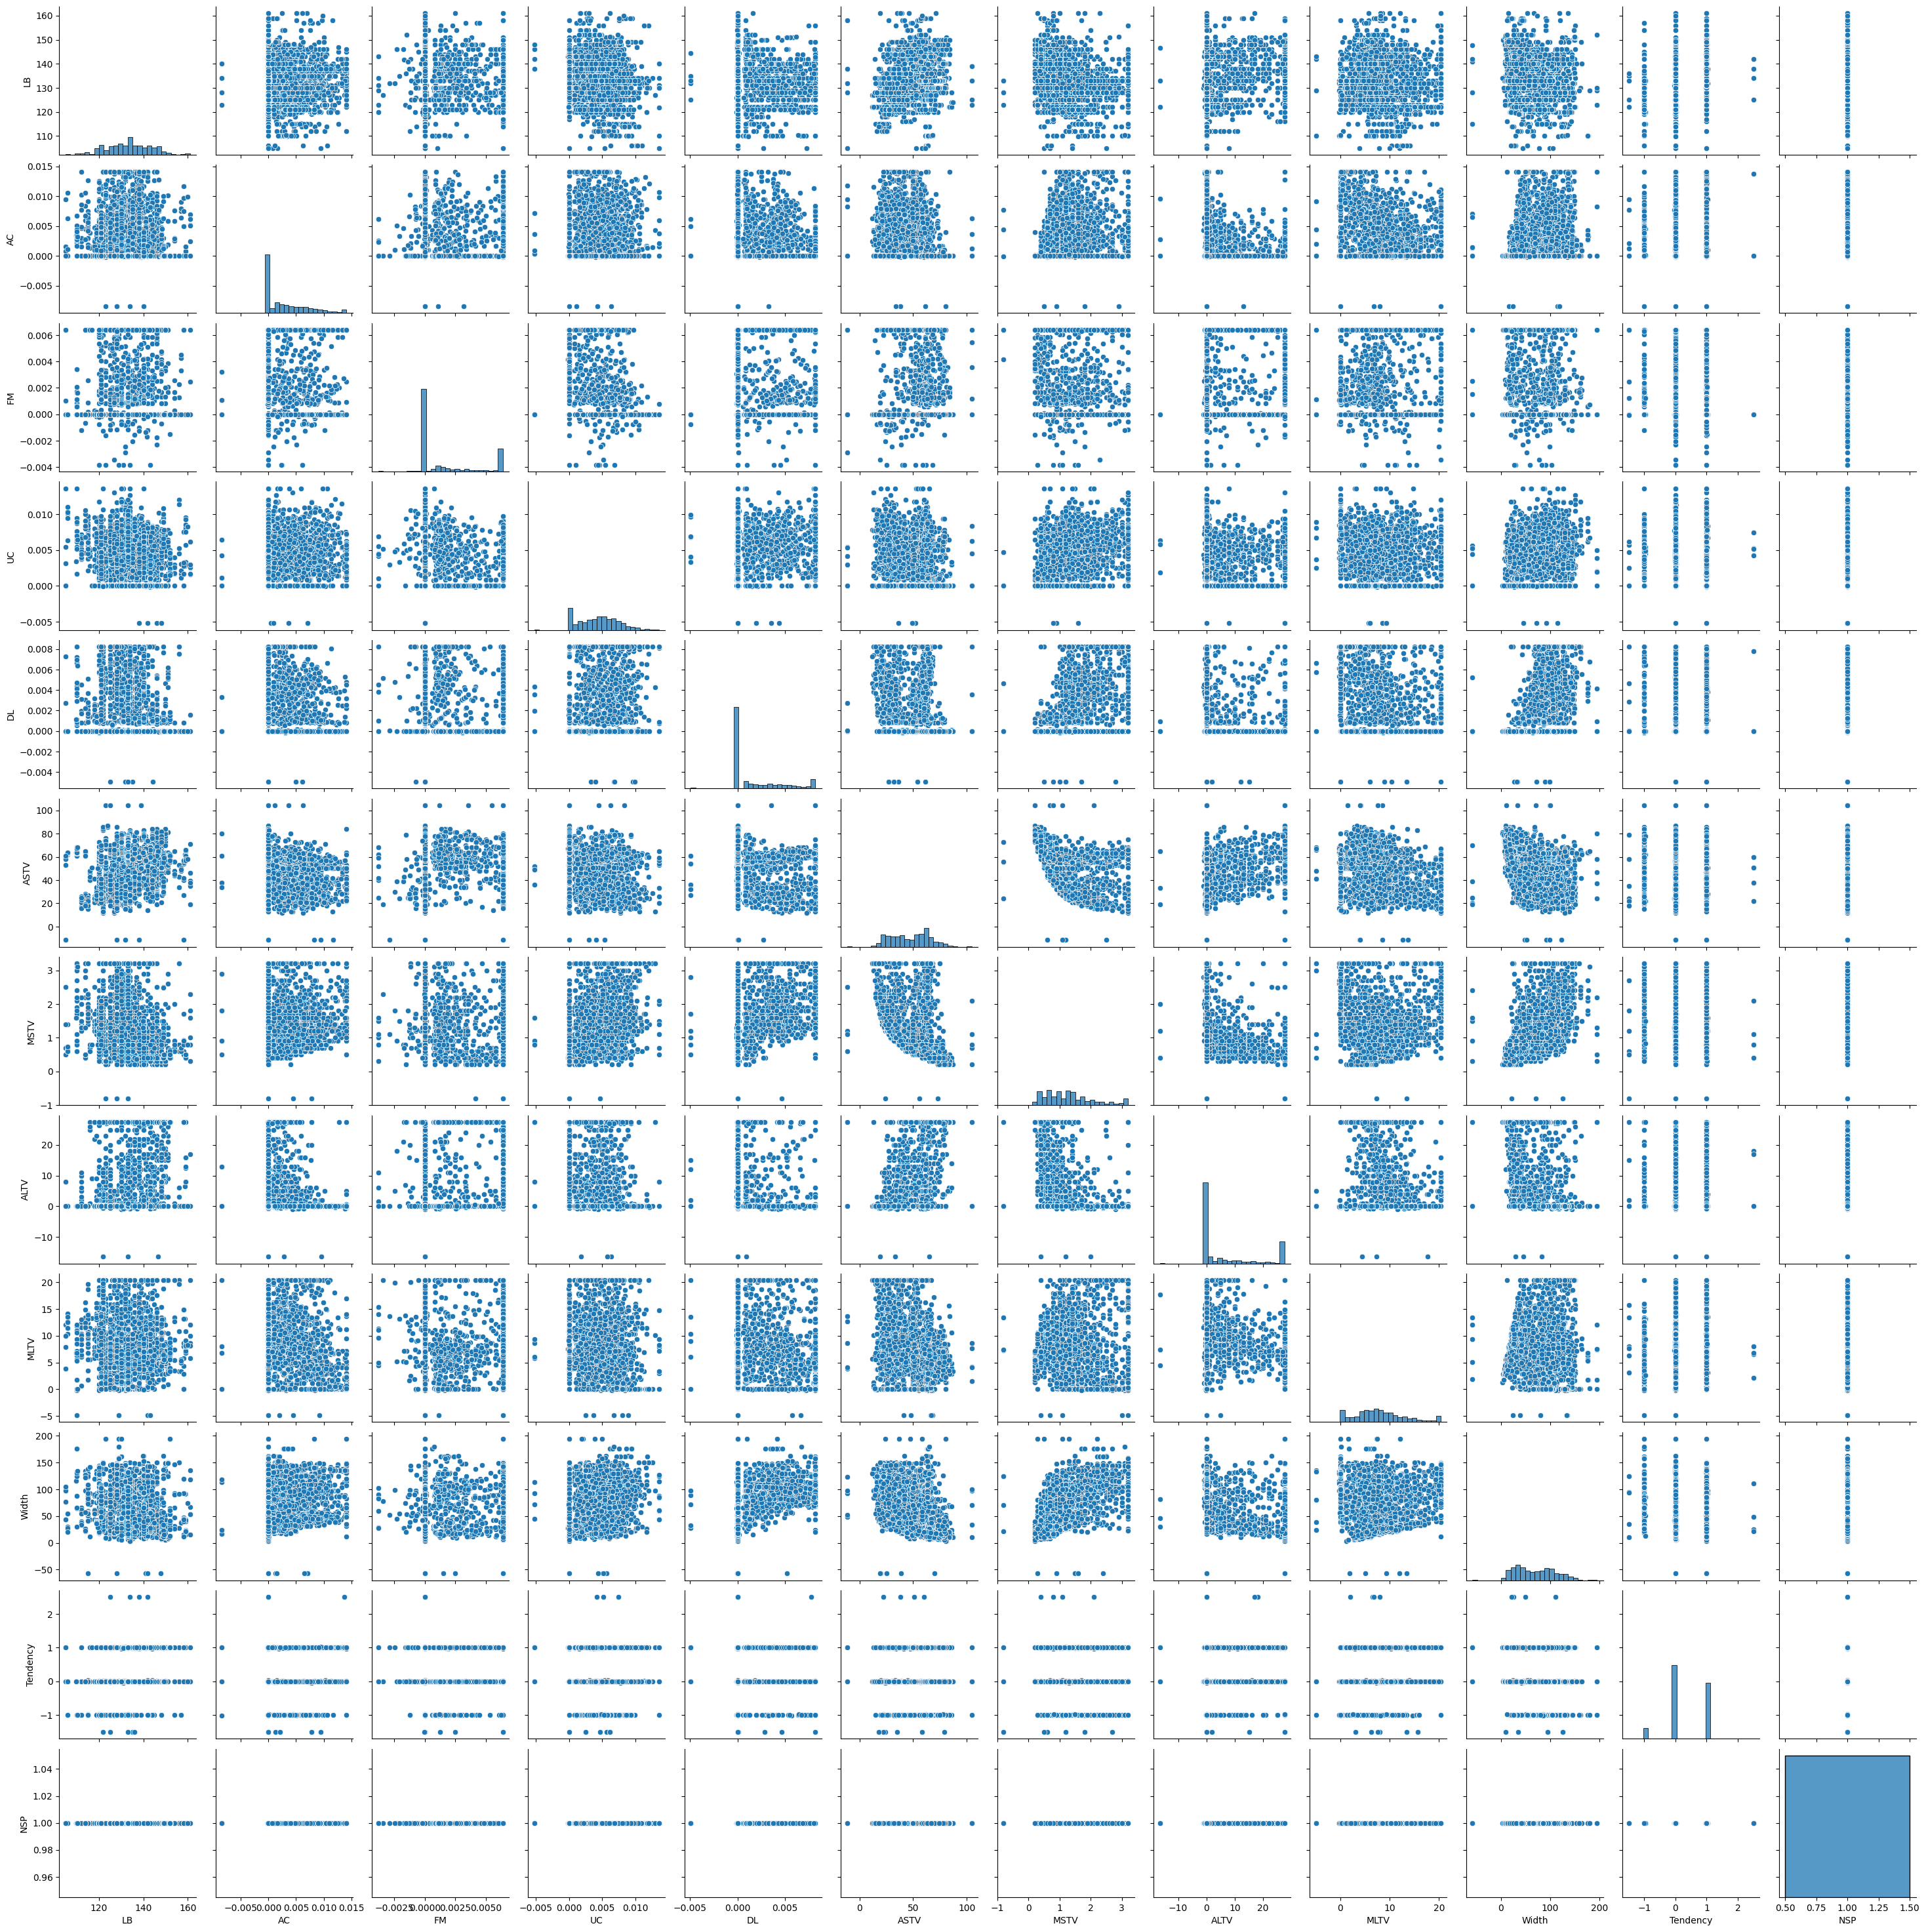

In [175]:
plt.figure(figsize=(20,20))
sns.pairplot(df)

#conclusion
* there was some null values in the columns and those null values were less than 5%. so, we have deleted the null values.
* there was no inconsistancy in datatypes. they were all numerical and continous.
* detected outliers and treated them
## key findings
* the datatypes of dataframe are consistent which made analysis easy
* most of the data was positively skewed, symmetric, asymmetric.
* MSTV-DL with 0.57 value,
Width-DL with 0.52 value,
MSTV-Width with 0.65 value are positively correlated. they increase together and decrease together.
* MSTV-ALTV,
ASTV-AC,
ALTV-Width are negatively correlated. if the value in one column increases the other will decrease.

